In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline
import pandas as pd
import json
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Climate Change and Correlation Analyzer/Climate_Change_Indicators.csv')
f = open('/content/drive/MyDrive/Climate Change and Correlation Analyzer/countries.geo.json')

world_json = json.load(f)
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [ ]:
year_list = []
for i in range(1963, 2023):
    year = f"F{i}"
    year_list.append(year)

df_melt = pd.melt(df, id_vars = ["Country"], value_vars = year_list)
df_melt.rename(columns={"variable":"Year", "value":"Tempurate_Change"}, inplace = True)
df_melt['Year'] = df_melt['Year'].str.replace(r'F', '', regex=True)
df_melt['Year'] = df_melt['Year'].astype(int)

In [ ]:
top_countries_year = df_melt.groupby(["Year", "Country"])["Tempurate_Change"].mean().reset_index()
top_countries_year = top_countries_year.groupby("Year").apply(lambda x: x.nlargest(1, "Tempurate_Change")).reset_index(drop=True)
top_countries_year = top_countries_year[top_countries_year["Year"] > 1999]

In [ ]:
fig = px.bar(top_countries_year.sort_values("Year", ascending=False), x='Year', y='Tempurate_Change', color='Tempurate_Change',
              color_continuous_scale = 'orrd', title='The country with the maximum temperature change for each year', text="Country",
              labels={'Tempurate_Change': 'Tempuarete Cahnge (°C)'})

fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.show()

In [ ]:
fig_bar = px.bar(df_melt.sort_values("Tempurate_Change", ascending = False).head(10), x='Country',
                 y='Tempurate_Change', color='Tempurate_Change', color_continuous_scale = 'orrd',
                 title='Countries With The Highest Temperature Increase (Top 10)', text="Country",
                 labels={'Tempurate_Change': 'Tempurate Change (°C)'})

fig_bar.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_bar.show()

In [ ]:
mean_tempurate_change_by_year = df_melt.groupby("Year").agg({"Tempurate_Change":"mean"}).reset_index()

In [ ]:
fig = px.line(mean_tempurate_change_by_year.sort_values("Year", ascending=False), x='Year', y='Tempurate_Change',
              title='Mean Tempurate Change for each Year', markers=True,
              labels={'Tempurate_Change': 'Tempurate Change (°C)'}, color_discrete_sequence=['#fdbb84'])

fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.show()

In [ ]:
access_token = 'pk.eyJ1IjoiYWJkdWxrZXJpbW5lc2UiLCJhIjoiY2s5aThsZWlnMDExcjNkcWFmaWUxcmh3YyJ9.s-4VLvmoPQFPXdu9Mcd6pA'
px.set_mapbox_access_token(access_token)

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df_melt,
    geojson=world_json,
    featureidkey='properties.name',
    locations='Country',
    color='Tempurate_Change',
    color_continuous_scale='orrd',
    projection='orthographic'
)
fig.update_geos(
    fitbounds="locations",
    visible=True
)
fig.update_layout(
    geo=dict(
        bgcolor='rgba(0,0,0,0)',  # arka plan rengi (siyah)
        showland=True,  # kara parçalarını gösterme
        showcountries=True  # ülke sınırlarını gösterme
    )
)


fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_melt['Tempurate_Change'] = pd.to_numeric(df_melt['Tempurate_Change'], errors='coerce')
max_tempurate = df_melt.loc[df_melt['Tempurate_Change'].idxmax()]
min_tempurate = df_melt.loc[df_melt['Tempurate_Change'].idxmin()]
print("-"*50)
print("Max Tempurate: ",max_tempurate)
print("-"*50)
print("Min Tempurate: ",min_tempurate)

--------------------------------------------------
Max Tempurate:  Country             Russian Federation
Year                              2020
Tempurate_Change                 3.691
Name: 12990, dtype: object
--------------------------------------------------
Min Tempurate:  Country             Greenland
Year                     1983
Tempurate_Change       -2.062
Name: 4578, dtype: object


In [ ]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv('/content/drive/MyDrive/Climate Change and Correlation Analyzer/Global Surface Temperature.csv')
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

,Year,Anomaly,Date,AverageTemperature,AverageTemperatureUncertainty,MaxTemperature,MaxTemperatureUncertainty,MinTemperature,MinTemperatureUncertainty,OceanAverageTemperature,OceanAverageTemperatureUncertainty
0,1850.0,-0.19,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1851.0,-0.09,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1852.0,-0.05,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1853.0,-0.10,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1854.0,-0.06,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose the required columns
global_temp_df = global_temp_df[['Date', 'OceanAverageTemperature']]

global_temp_df['Date'] = pd.to_datetime(global_temp_df['Date'], format='%m/%d/%Y', errors='coerce')
global_temp_df.set_index('Date', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)


global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'OceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year

In [ ]:
# Check the number of missing values and the corresponding years
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    0
dtype: int64
Index([], dtype='int32', name='Year')


In [ ]:
global_temp_df.dropna(inplace = True)

In [ ]:
# Calculate the global baseline temperature
global_ref_temp = global_temp_df.loc['1951':'2024'].mean()['AnnualAverageTemp']

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

,Temperature Anomaly
Year,
1900,-0.349819
1901,-0.420403
1902,-0.535403
1903,-0.657153
1904,-0.683319


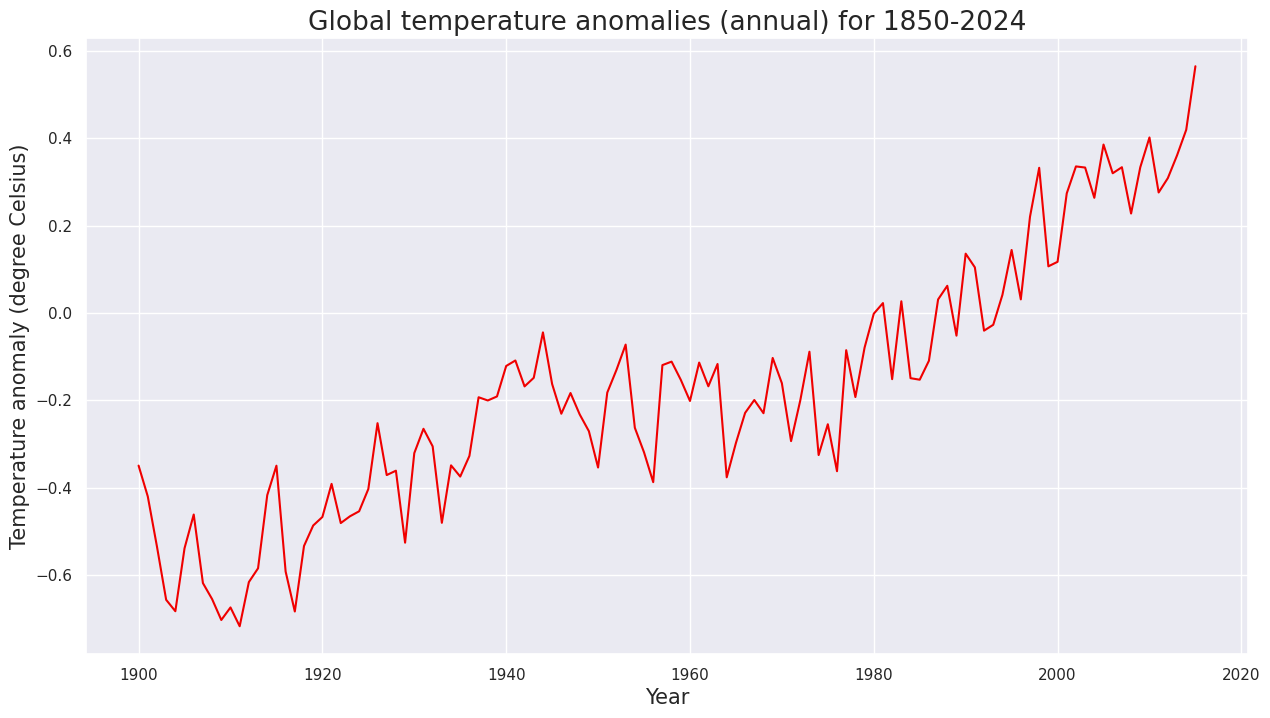

In [ ]:
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temperature Anomaly'] ,  color=(240/255, 0, 0, 1))

plt.title('Global temperature anomalies (annual) for 1850-2024', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()


#Climate-related_Disasters_Frequency

In [ ]:
# Load the natural disaster dataset and store it in a dataframe
orig_disaster_data = pd.read_csv('/content/drive/MyDrive/Climate Change and Correlation Analyzer/Climate_related_Disasters_Frequency.csv')
nat_disaster_df = orig_disaster_data.copy()

nat_disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [ ]:
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)


nat_disaster_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [ ]:
nat_disaster_df = nat_disaster_df.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
nat_disaster_df.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nat_disaster_df.drop(['Impact'], axis = 1, inplace = True)

nat_disaster_df.fillna(value = 0, inplace = True)
nat_disaster_df = nat_disaster_df.add_suffix(' (Occurrence)')

nat_disaster_df.head()

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


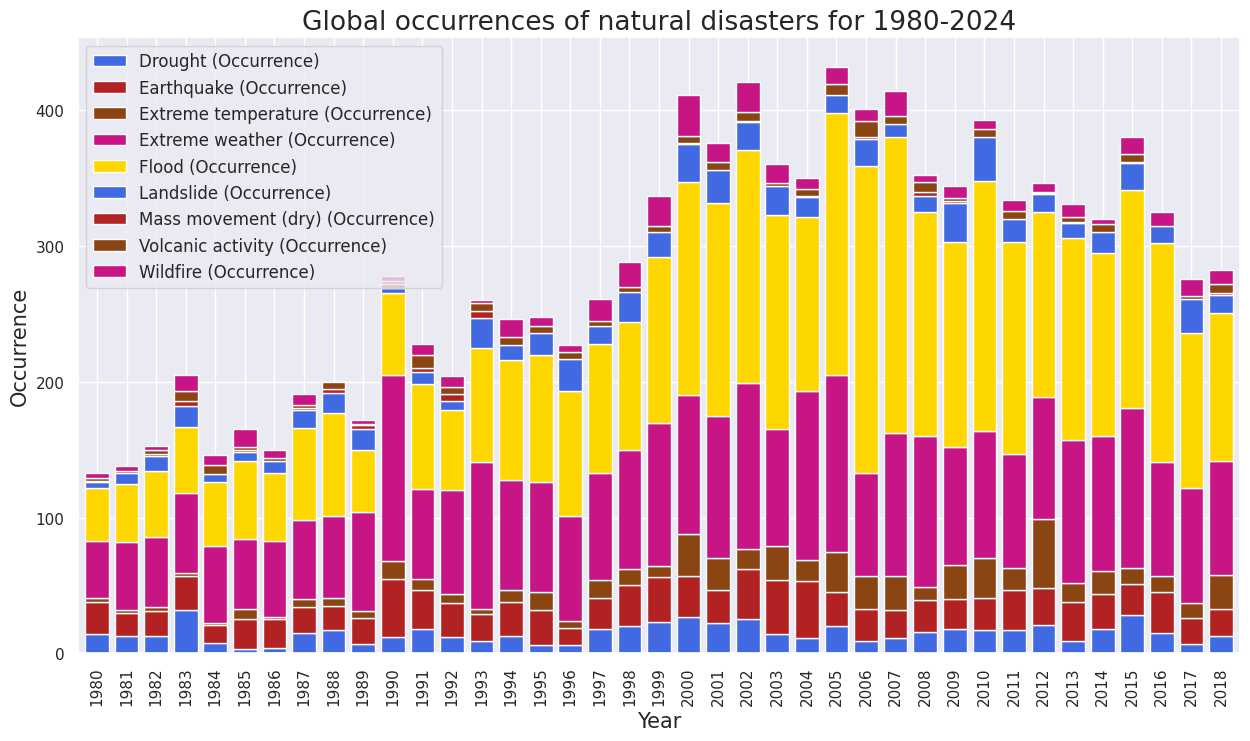

In [ ]:
colors = ['#4169e1', '#b22222','#8b4513', '#c71585', '#ffd700']
# Change 'color' to 'facecolor' to specify bar color
nat_disaster_df.drop(['All natural disasters (Occurrence)'], axis=1).loc[1980:].plot.bar(
    width=0.8, stacked=True, color=colors, figsize=(15, 8)
)

plt.title('Global occurrences of natural disasters for 1980-2024', fontsize=19)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Occurrence', fontsize=15)
plt.legend(loc=2, prop={'size': 12})

plt.show()


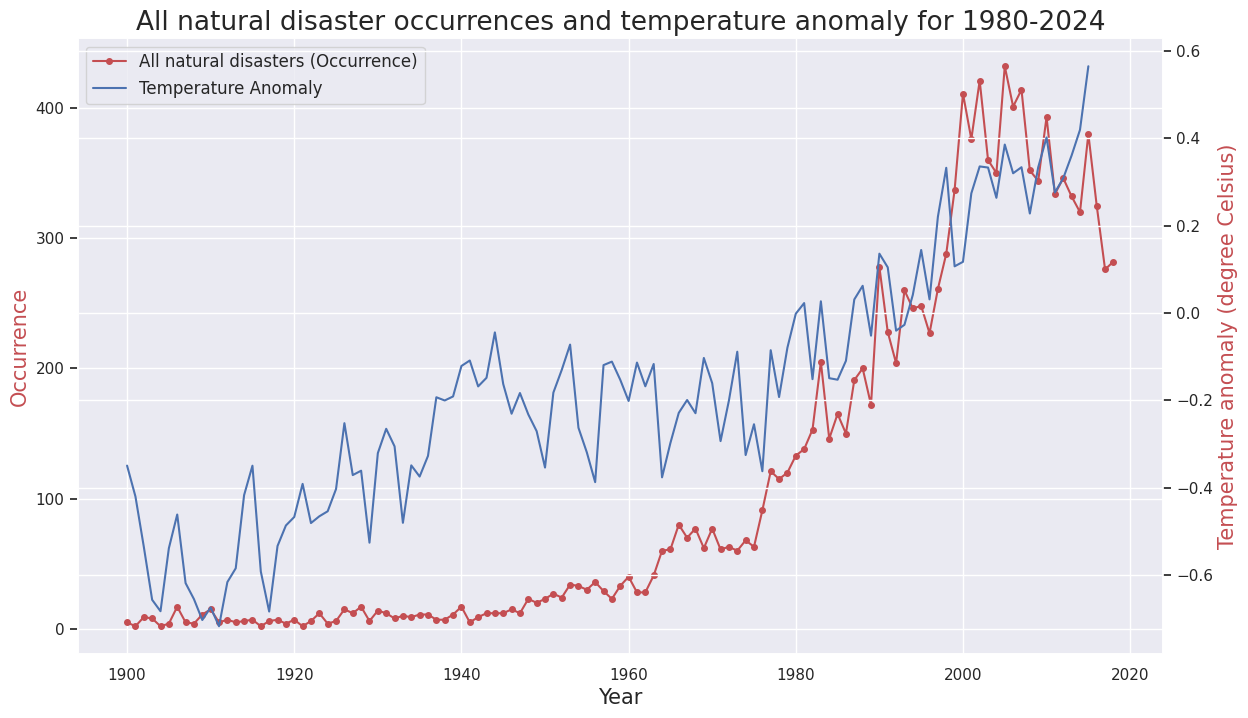

In [ ]:
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[:2024, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(global_temp_df.loc[1900:, 'Temperature Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1980-2024', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'r')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

In [ ]:
# Load the economic damage dataset and store it in a dataframe
orig_econ_data = pd.read_csv('/content/drive/MyDrive/Climate Change and Correlation Analyzer/Econ_Damage-from-Disasters.csv')
econ_dmg_df = orig_econ_data.copy()

econ_dmg_df.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [ ]:
# Remove the 'Code' column
econ_dmg_df.drop(['Code'], axis = 1, inplace = True)

# Pivot the dataframe
econ_dmg_df = econ_dmg_df.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')
econ_dmg_df.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
econ_dmg_df.drop(['Impact'], axis = 1, inplace = True)

econ_dmg_df.fillna(value = 0, inplace = True)
econ_dmg_df = econ_dmg_df.add_suffix(' (Economic Damage)')

econ_dmg_df.head()

Entity,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


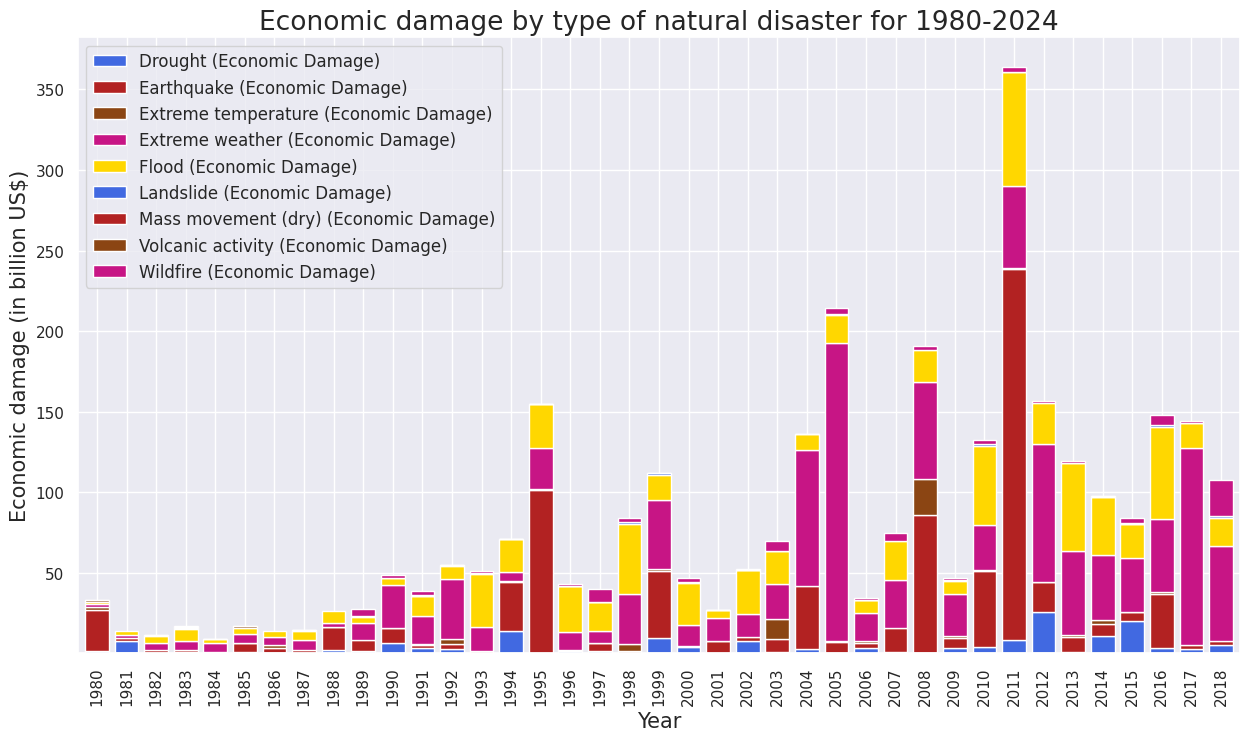

In [ ]:
((econ_dmg_df.drop(['All natural disasters (Economic Damage)'], axis = 1).loc[1980:]) / 1e9).plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Economic damage by type of natural disaster for 1980-2024', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Economic damage (in billion US$)', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

In [ ]:
combined_df = global_temp_df.join([nat_disaster_df, econ_dmg_df], how = 'inner')
combined_df.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.349819,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,-0.420403,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.535403,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,-0.657153,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,-0.683319,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
correlation_table = combined_df.corr()
correlation_table.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Temperature Anomaly,1.000000,0.865128,0.750086,0.796451,0.738191,0.848536,0.841740,0.772180,0.257074,0.669120,...,0.647406,0.515849,0.346882,0.294110,0.588786,0.678628,0.353444,0.010518,0.215112,0.557517
All natural disasters (Occurrence),0.865128,1.000000,0.854789,0.903392,0.859863,0.969517,0.978128,0.894296,0.349152,0.788590,...,0.740809,0.550956,0.400397,0.335689,0.686369,0.759470,0.439097,-0.047811,0.203272,0.624099
Drought (Occurrence),0.750086,0.854789,1.000000,0.815286,0.684009,0.829133,0.785536,0.790511,0.398695,0.710884,...,0.578329,0.583563,0.293073,0.255171,0.525367,0.600423,0.518547,-0.068802,0.251909,0.515664
Earthquake (Occurrence),0.796451,0.903392,0.815286,1.000000,0.721105,0.917687,0.824128,0.778272,0.408753,0.708440,...,0.667560,0.509985,0.394882,0.321490,0.588992,0.663298,0.416438,-0.063196,0.263032,0.538465
Extreme temperature (Occurrence),0.738191,0.859863,0.684009,0.721105,1.000000,0.776985,0.870008,0.751340,0.165342,0.556775,...,0.680193,0.596794,0.316083,0.229073,0.704082,0.657396,0.296600,-0.033887,0.097393,0.569856


In [ ]:
combined_df.corr()['Temperature Anomaly']

,Temperature Anomaly
Temperature Anomaly,1.000000
All natural disasters (Occurrence),0.865128
Drought (Occurrence),0.750086
Earthquake (Occurrence),0.796451
Extreme temperature (Occurrence),0.738191
Extreme weather (Occurrence),0.848536
Flood (Occurrence),0.841740
Landslide (Occurrence),0.772180
Mass movement (dry) (Occurrence),0.257074
Volcanic activity (Occurrence),0.669120


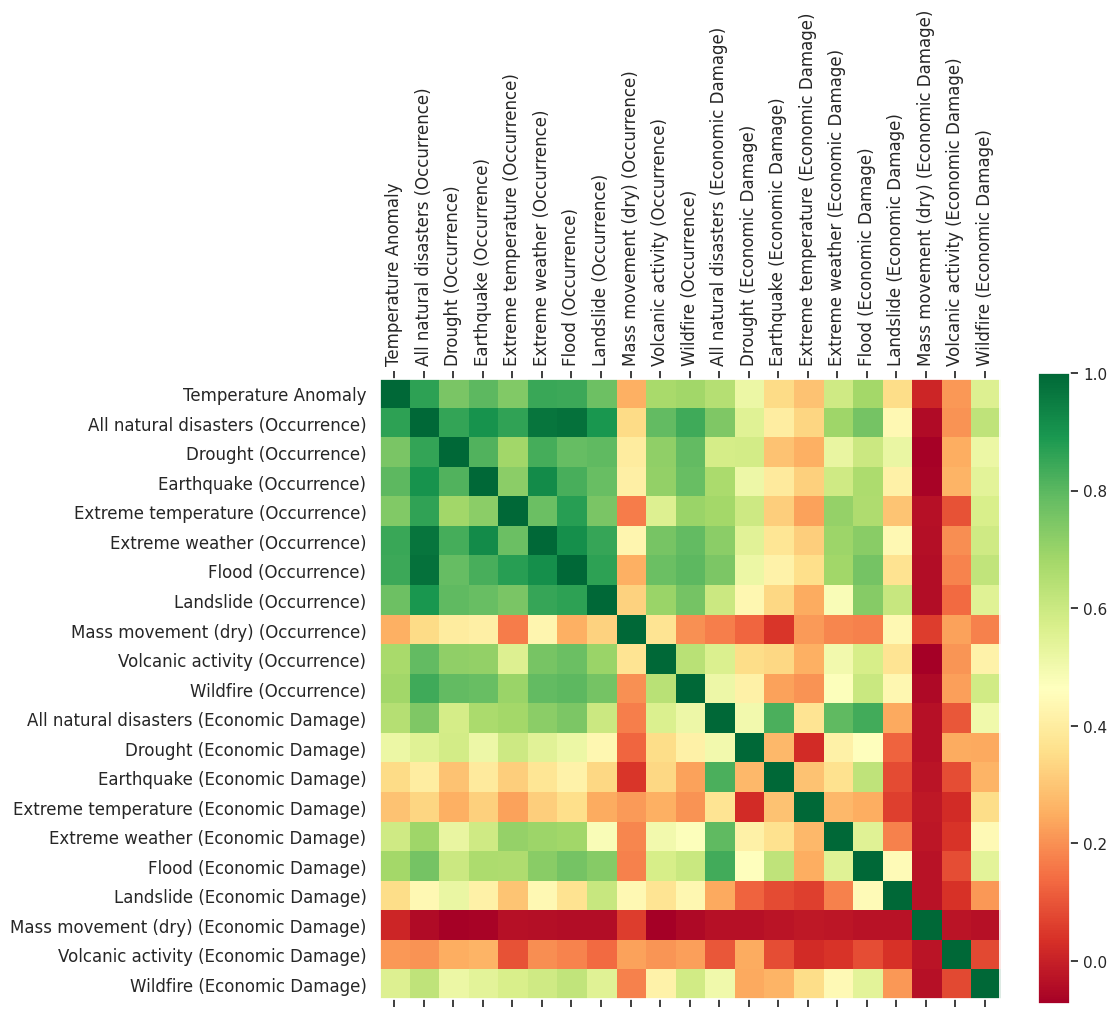

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

plt.show()

In [ ]:
combined_df2 = global_temp_df.join([nat_disaster_df, df_melt], how = 'inner')
combined_df.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.349819,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,-0.420403,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.535403,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,-0.657153,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,-0.683319,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
combined_df2 = combined_df2.drop(columns=['Country'])
correlation_table = combined_df2.corr()
correlation_table.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence),Year,Tempurate_Change
Temperature Anomaly,1.000000,0.865128,0.750086,0.796451,0.738191,0.848536,0.841740,0.772180,0.257074,0.669120,0.683839,NaN,0.084654
All natural disasters (Occurrence),0.865128,1.000000,0.854789,0.903392,0.859863,0.969517,0.978128,0.894296,0.349152,0.788590,0.837557,NaN,0.005459
Drought (Occurrence),0.750086,0.854789,1.000000,0.815286,0.684009,0.829133,0.785536,0.790511,0.398695,0.710884,0.788781,NaN,0.015746
Earthquake (Occurrence),0.796451,0.903392,0.815286,1.000000,0.721105,0.917687,0.824128,0.778272,0.408753,0.708440,0.778318,NaN,0.011886
Extreme temperature (Occurrence),0.738191,0.859863,0.684009,0.721105,1.000000,0.776985,0.870008,0.751340,0.165342,0.556775,0.694524,NaN,0.008229


In [ ]:
combined_df2.corr()['Temperature Anomaly']

,Temperature Anomaly
Temperature Anomaly,1.000000
All natural disasters (Occurrence),0.865128
Drought (Occurrence),0.750086
Earthquake (Occurrence),0.796451
Extreme temperature (Occurrence),0.738191
Extreme weather (Occurrence),0.848536
Flood (Occurrence),0.841740
Landslide (Occurrence),0.772180
Mass movement (dry) (Occurrence),0.257074
Volcanic activity (Occurrence),0.669120


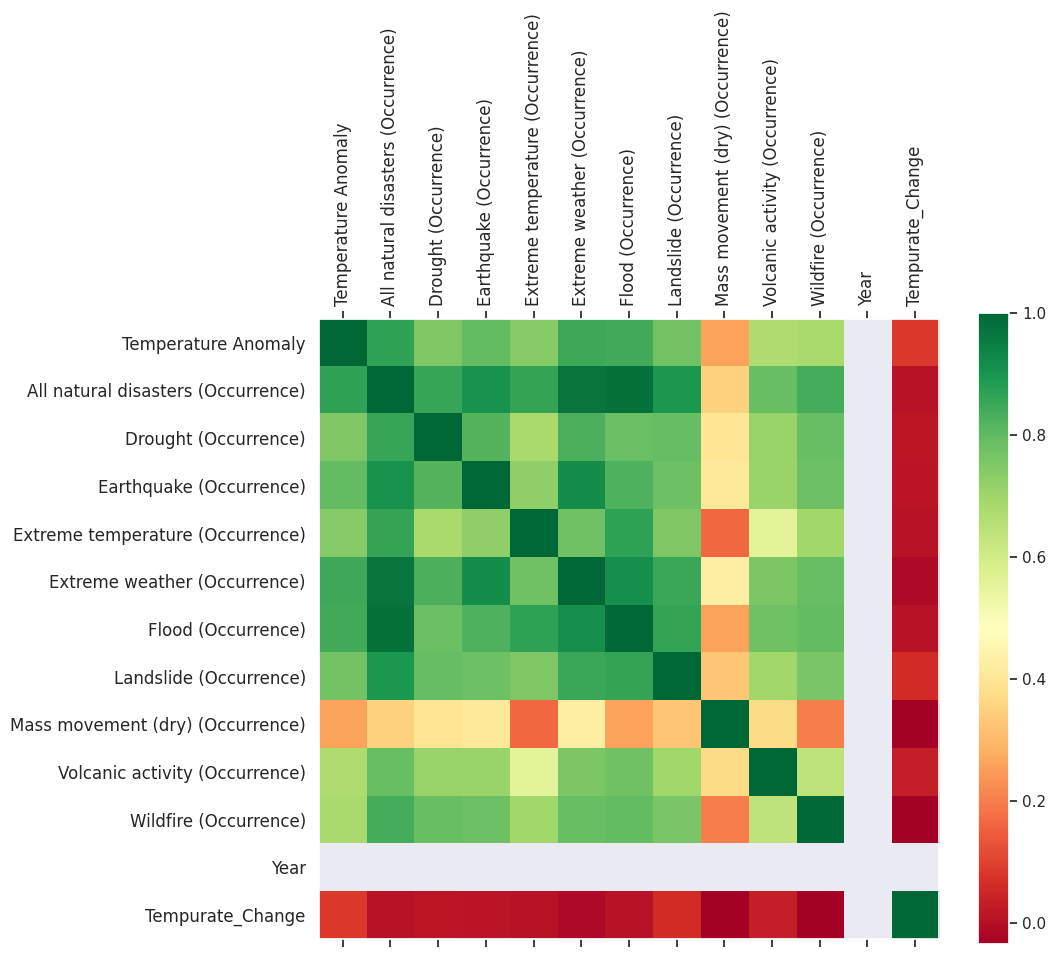

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

plt.show()